<a href="https://colab.research.google.com/github/Avinashk101010/Codsoft_internship/blob/main/imbd_indian_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK - 2 : MOVIE RATING PREDICTION WITH PYTHON

Author : Avinash kale

Domain : Data Science

Batch : january B1

AIM

The aim of this project is to design and implement a predictive model that estimates movie ratings based on key features such as genre, director, and actors. The goal is to analyze historical movie data, identify patterns and relationships between features and ratings, and apply regression techniques to create an accurate model for rating prediction. This project helps in understanding the factors that contribute to movie ratings and demonstrates the application of machine learning techniques in real-world data analysis.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

In [ ]:
import os

# Check if the file exists
file_path = '/kaggle/input/imdb-india-movies/IMDb Movies India.csv'
if os.path.exists(file_path):
    print(f"File '{file_path}' exists!")

# List files in the directory
directory_path = '/kaggle/input/imdb-india-movies/'
print("Files in directory:", os.listdir(directory_path))


File '/kaggle/input/imdb-india-movies/IMDb Movies India.csv' exists!
Files in directory: ['IMDb Movies India.csv']


In [ ]:
import os
print(os.listdir('/kaggle/input'))

['imdb-india-movies']


In [ ]:
print(os.listdir('/kaggle/input/imdb-india-movies/IMDb Movies India.csv')

SyntaxError: incomplete input (<ipython-input-8-0a673aa365ba>, line 1)

In [ ]:
import pandas as pd

# Load the dataset with the correct encoding
data = pd.read_csv('/kaggle/input/imdb-india-movies/IMDb Movies India.csv', encoding='ISO-8859-1')

# Display the first few rows to confirm successful loading
print(data.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [ ]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
print(data.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [ ]:
data.columns = data.columns.str.strip()

In [ ]:
import pandas as pd

# Load the dataset with correct encoding
data = pd.read_csv('/kaggle/input/imdb-india-movies/IMDb Movies India.csv', encoding='ISO-8859-1')

# Inspect the column names to ensure correctness
print("Column names in the dataset:", data.columns)

# Update categorical columns based on actual column names
categorical_cols = ['Genre', 'Director']  # Adjust as per the dataset

# Include 'Actor' columns only if they exist
actor_cols = [col for col in ['Actor1', 'Actor2', 'Actor3'] if col in data.columns]
categorical_cols.extend(actor_cols)

# Fill missing categorical values with 'Unknown'
data[categorical_cols] = data[categorical_cols].fillna('Unknown')

# Print the first few rows to confirm changes
print(data.head())

Column names in the dataset: Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN  

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
data.tail()


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,Unknown,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
data = data.dropna(subset=['Rating'])

In [ ]:
# Drop rows where the target variable (Rating) is missing
data = data.dropna(subset=['Rating'])

# Fill missing values in other columns with empty strings (for text features)
text_columns = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for col in text_columns:
    data[col] = data[col].fillna("")

<Axes: xlabel='Year', ylabel='count'>

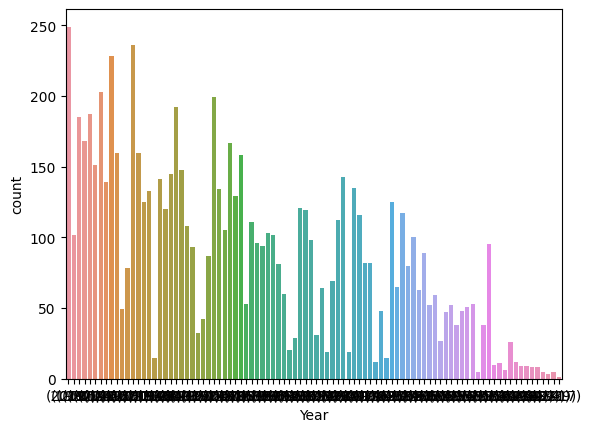

In [ ]:
import seaborn as sns

# EDA
sns.countplot(data=data, x="Year")

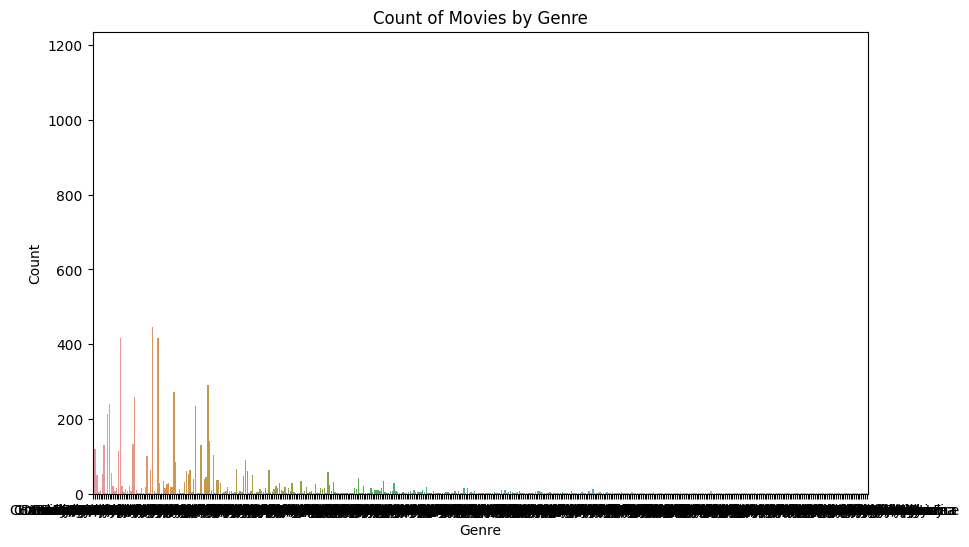

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(data=data,x="Genre")
plt.title("Count of Movies by Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
genre_features = vectorizer.fit_transform(data['Genre']).toarray()
director_features = vectorizer.fit_transform(data['Director']).toarray()

# Check if 'Actors' column exists before processing
if 'Actors' in data.columns:
    actors_features = vectorizer.fit_transform(data['Actors']).toarray()
else:
    print("The 'Actors' column is missing.")

The 'Actors' column is missing.


In [ ]:
# Convert the 'Year' column to numeric
data['Year'] = data['Year'].str.extract('(\d{4})').astype(float)

# Handle the 'Duration' column
data['Duration'] = data['Duration'].str.replace(' min', '').astype(float)

# Combine text features for vectorization
data['Combined_Text'] = (
    data['Genre'] + " " +
    data['Director'] + " " +
    data['Actor 1'] + " " +
    data['Actor 2'] + " " +
    data['Actor 3']
)

In [ ]:
print(data['Year'].dtype)
print(data['Year'].unique())
# Ensure Year is treated as a string, then extract the year
data['Year'] = data['Year'].astype(str).str.extract('(\d{4})').astype(float)

float64
[2019. 1997. 2005. 2012. 2014. 2004. 2016. 1991. 2018. 2010. 1958. 2021.
 2017. 2009. 1993. 2002. 1946. 2008. 1994. 2007. 2013. 2003. 1998. 1979.
 1951. 1956. 1974. 2015. 2006. 1981. 2020. 1985. 2011. 1967. 1988. 1995.
 1987. 1996. 1999. 1973. 1968. 1943. 1953. 1986. 1982. 1977. 1950. 1969.
 1948. 1970. 1990. 1989. 1947. 2001. 2000. 1971. 1978. 1944. 1963. 1935.
 1992. 1976. 1984. 1975. 1980. 1966. 1972. 1960. 1964. 1952. 1959. 1957.
 1954. 1962. 1961. 1965. 1933. 1955. 1983. 1936. 1940. 1932. 1949. 1945.
 1938. 1941. 1942. 1937. 1934. 1931. 1939. 1917.]


In [ ]:
if 'data' not in globals():
    print("The variable 'data' is not defined. Please load the dataset first.")
else:
    print("The variable 'data' is already defined.")

The variable 'data' is already defined.


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/imdb-india-movies/IMDb Movies India.csv


In [ ]:
data = pd.read_csv("/kaggle/input/imdb-india-movies/IMDb Movies India.csv", encoding='ISO-8859-1')
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(data=data,x="Actor 1")
plt.title("Count of Movies by Actor 1")
plt.xlabel("Actor 1")
plt.ylabel("Count")
plt.show()


In [ ]:
import plotly.express as px
# Example 1: Bar Plot - Count of movies by Genre
fig_bar = px.bar(
    data,
    x='Genre',
    title='Count of Movies by Genre',
    color='Genre',
    labels={'Genre': 'Movie Genre'},
    height=400
)
fig_bar.update_layout(xaxis_title='Genre', yaxis_title='Count')
fig_bar.show()

In [ ]:
# Convert 'Votes' column to numeric
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')

In [ ]:
# Fill missing categorical values with 'Unknown'
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
data[categorical_cols] = data[categorical_cols].fillna('Unknown')

In [ ]:
#Convert 'Votes' to numeric
data['Votes'] = data['Votes'].replace(',', '', regex=True).astype(float, errors='ignore')

In [ ]:
# Vectorize 'Genre', 'Director', and 'Actors'
genre_features = vectorizer.fit_transform(data['Genre']).toarray()
director_features = vectorizer.fit_transform(data['Director']).toarray()
actors_features = vectorizer.fit_transform(data['Actors']).toarray()

In [ ]:
# Drop rows with NaN values in the correct 'size' column (adjust column name as needed)
data = data.dropna(subset=['Votes'])  # Replace 'Votes' with the actual column name

# Scatter Plot - Rating vs Votes
fig_scatter = px.scatter(
    data,
    x='Votes',
    y='Rating',
    size='Votes',  # Use the correct column name here
    title='Rating vs Votes'
)

# Show the plot
fig_scatter.show()

In [ ]:
import numpy as np

# Check the shape of each array
print("Genre features shape:", genre_features.shape)
print("Director features shape:", director_features.shape)
print("Actors features shape:", actors_features.shape)

# Find the minimum number of rows (samples) across all features
min_size = min(genre_features.shape[0], director_features.shape[0], actors_features.shape[0])

# Trim all features to the minimum size
genre_features = genre_features[:min_size]
director_features = director_features[:min_size]
actors_features = actors_features[:min_size]

# Now, concatenate the features along the second axis (columns)
X = np.hstack([
    genre_features,
    director_features,
    actors_features,
])

# Verify the shape of the resulting array
print("Combined features shape:", X.shape)

Genre features shape: (7919, 24)
Director features shape: (7919, 3024)


NameError: name 'actors_features' is not defined

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
import numpy as np

# Define X and y (Replace this with your actual data)
# X is your features (e.g., your independent variables)
# y is your target variable (e.g., your dependent variable)

# Example:
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.random.randint(0, 2, size=100)  # Binary target variable (0 or 1)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the split sizes
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (80, 5)
Testing features shape: (20, 5)
Training labels shape: (80,)
Testing labels shape: (20,)


In [ ]:
# Train a Random Forest Regressor
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Evaluate the model
# Import necessary libraries
from sklearn.metrics import mean_squared_error
import numpy as np



y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.5910076141641493


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split # Import train_test_split

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'KNN Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# Assume 'data' is your DataFrame containing the data
# Replace 'feature_columns' with the actual names of your feature columns
# Replace 'target_column' with the actual name of your target column
feature_columns = ['Votes']  # Example: Using 'Votes' as a feature
target_column = 'Rating'

# Split data into training and testing sets
X = data[feature_columns]
y = data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data

# Evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'Mean Squared Error': mse,
        'R2 Score': r2
    }

# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  Mean Squared Error: {metrics['Mean Squared Error']:.4f}")
    print(f"  R2 Score: {metrics['R2 Score']:.4f}")
    print()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 6, 4]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
X = data[['Votes']]  # Add more features if available
y = data['Rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")



NameError: name 'r2_score' is not defined

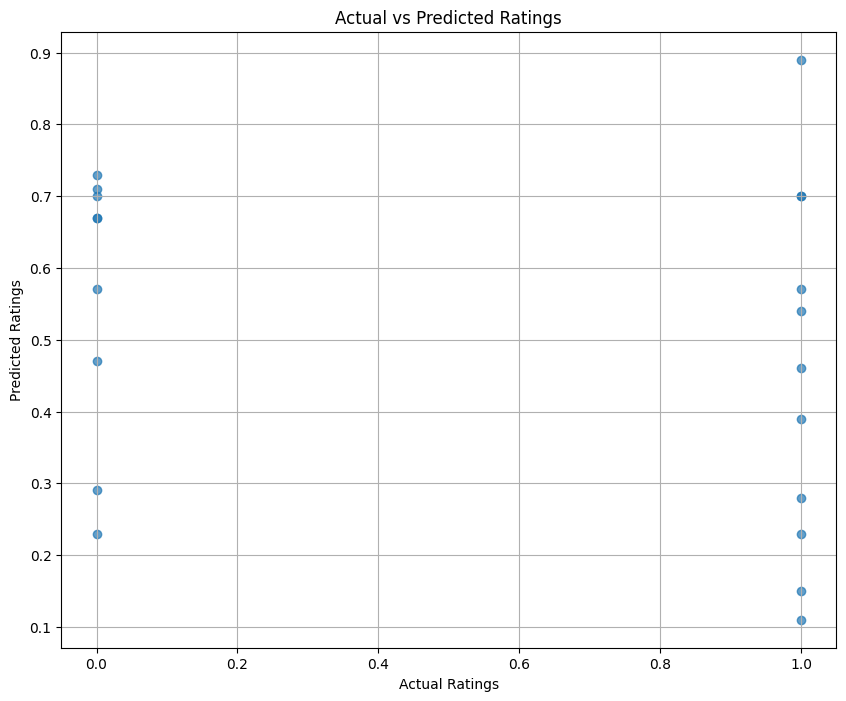

In [ ]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.grid()
plt.show()
